In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('E-Commerce_train.xlsx')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
df.Gender.value_counts()

F    4540
M    4459
Name: Gender, dtype: int64

In [6]:
df.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [7]:
df.Mode_of_Shipment.value_counts()

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [8]:
df.Product_importance.value_counts()

low       4308
medium    3858
high       833
Name: Product_importance, dtype: int64

In [9]:
df['Reached.on.Time_Y.N'].value_counts()

1    5719
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

## Codifico datos para que puedan ser interpretados por los modelos

In [10]:
dict = {'M': 0, 'F': 1}
df['Gender'] = df.Gender.map(dict)

In [11]:
dict = {'A': 0, 'B': 1,'C': 2,'D': 3,'E': 4,'F': 5}
df['Warehouse_block'] = df.Warehouse_block.map(dict)

In [12]:
dict = {'Ship': 0, 'Flight': 1,'Road': 2}
df['Mode_of_Shipment'] = df.Mode_of_Shipment.map(dict)

In [13]:
dict = {'low': 0, 'medium': 1,'high': 2}
df['Product_importance'] = df.Product_importance.map(dict)

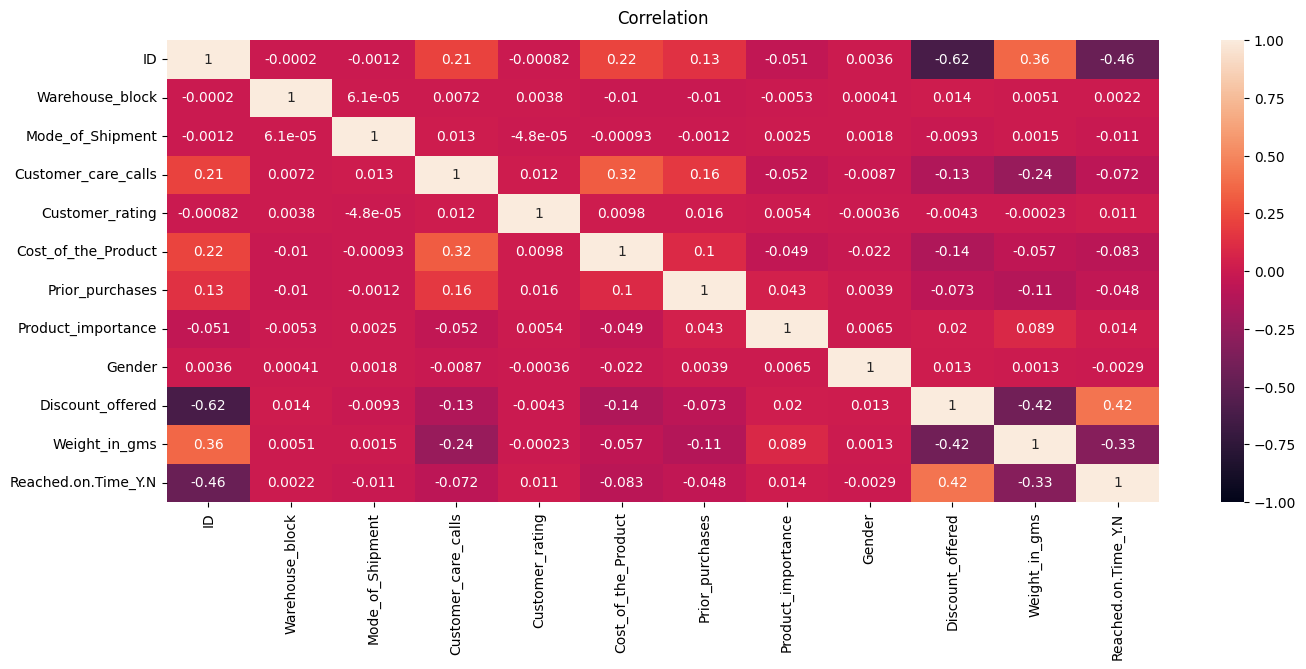

In [43]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation', fontdict={'fontsize':12}, pad=12);

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('Reached.on.Time_Y.N', axis=1)

Y = df['Reached.on.Time_Y.N']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Uso liblinear porque es un dataset relativemente pequeño

In [35]:
log_clf = LogisticRegression(solver='liblinear')

In [36]:
log_clf.fit(x_train,y_train)
y_pred = log_clf.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print('recall: ',recall_score(y_test, y_pred) ,'accuracy: ',accuracy_score(y_test, y_pred))

recall:  0.7459605026929982 accuracy:  0.6761111111111111


In [44]:
df_test=pd.read_excel('E-Commerce_test.xlsx')

In [45]:
df_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


In [47]:
df_test.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.00000,2000.00000
mean,9999.500000,4.231500,2.97050,217.555000,3.82000,5.61400,3857.42650
std,577.494589,1.136465,1.41585,46.336276,1.45453,2.90469,1707.78448
min,9000.000000,2.000000,1.00000,96.000000,2.00000,1.00000,1003.00000
25%,9499.750000,3.000000,2.00000,179.750000,3.00000,3.00000,1773.75000
50%,9999.500000,4.000000,3.00000,226.000000,4.00000,6.00000,4536.00000
75%,10499.250000,5.000000,4.00000,255.000000,5.00000,8.00000,5241.25000
max,10999.000000,7.000000,5.00000,310.000000,10.00000,10.00000,6000.00000


In [48]:
df_test.Gender.value_counts()

F    1005
M     995
Name: Gender, dtype: int64

In [49]:
df_test.Warehouse_block.value_counts()

F    667
D    334
A    333
B    333
C    333
Name: Warehouse_block, dtype: int64

In [50]:
df_test.Mode_of_Shipment.value_counts()

Ship      1340
Road       330
Flight     330
Name: Mode_of_Shipment, dtype: int64

In [51]:
df_test.Product_importance.value_counts()

low       989
medium    896
high      115
Name: Product_importance, dtype: int64

## Codifico datos para que puedan ser interpretados por los modelos

In [54]:
dict = {'M': 0, 'F': 1}
df_test['Gender'] = df_test.Gender.map(dict)

In [55]:
dict = {'A': 0, 'B': 1,'C': 2,'D': 3,'E': 4,'F': 5}
df_test['Warehouse_block'] = df_test.Warehouse_block.map(dict)

In [56]:
dict = {'Ship': 0, 'Flight': 1,'Road': 2}
df_test['Mode_of_Shipment'] = df_test.Mode_of_Shipment.map(dict)

In [57]:
dict = {'low': 0, 'medium': 1,'high': 2}
df_test['Product_importance'] = df_test.Product_importance.map(dict)

In [58]:
y_pred_test = log_clf.predict(df_test)

In [61]:
df_prueba=pd.DataFrame(y_pred_test)

In [67]:
df_prueba.to_csv('rampullet.csv',index=False,header=['pred'])